Importing Libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

Loading Dataset

In [41]:
csv_file_path='/content/banana_quality.csv'
df=pd.read_csv(csv_file_path)
print(df)

          Size    Weight  Sweetness  Softness  HarvestTime  Ripeness  \
0    -1.924968  0.468078   3.077832 -1.472177     0.294799  2.435570   
1    -2.409751  0.486870   0.346921 -2.495099    -0.892213  2.067549   
2    -0.357607  1.483176   1.568452 -2.645145    -0.647267  3.090643   
3    -0.868524  1.566201   1.889605 -1.273761    -1.006278  1.873001   
4     0.651825  1.319199  -0.022459 -1.209709    -1.430692  1.078345   
...        ...       ...        ...       ...          ...       ...   
7995 -6.414403  0.723565   1.134953  2.952763     0.297928 -0.156946   
7996  0.851143 -2.217875  -2.812175  0.489249    -1.323410 -2.316883   
7997  1.422722 -1.907665  -2.532364  0.964976    -0.562375 -1.834765   
7998 -2.131904 -2.742600  -1.008029  2.126946    -0.802632 -3.580266   
7999 -2.660879 -2.044666   0.159026  1.499706    -1.581856 -1.605859   

       Acidity Quality  
0     0.271290    Good  
1     0.307325    Good  
2     1.427322    Good  
3     0.477862    Good  
4     2.81

Scatter plot of the data

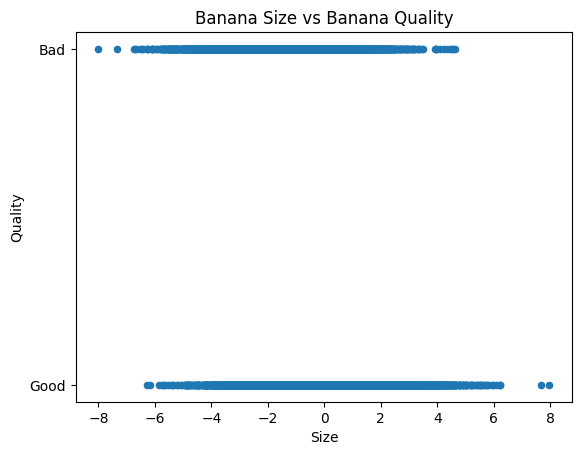

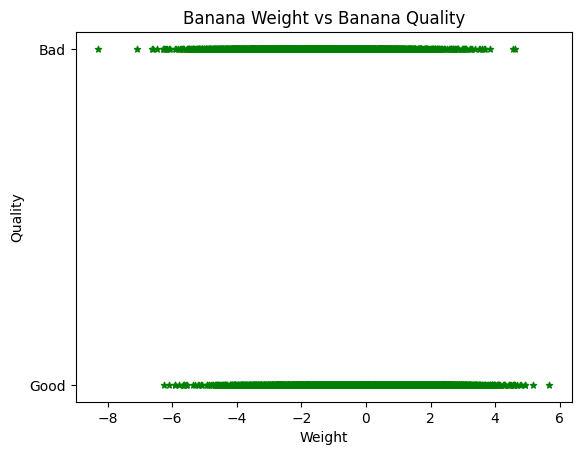

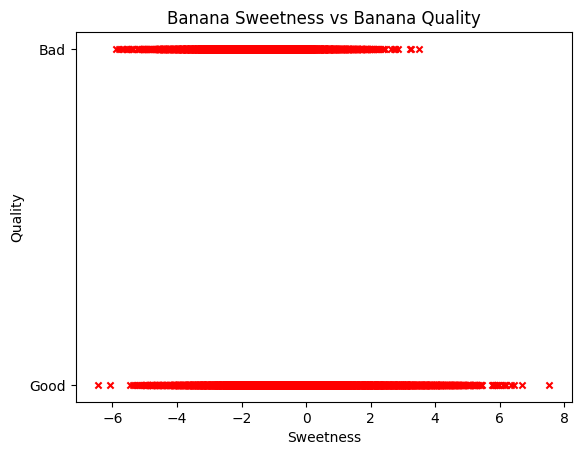

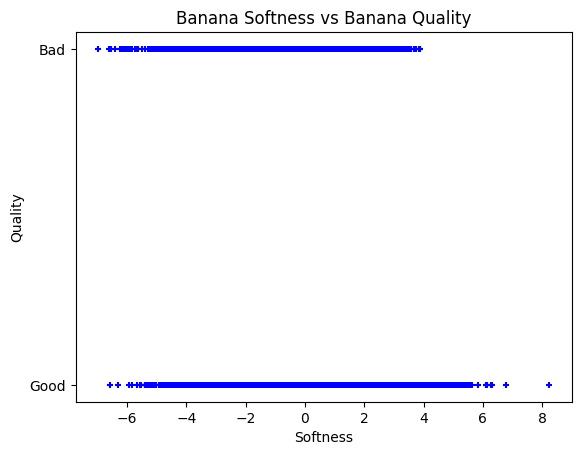

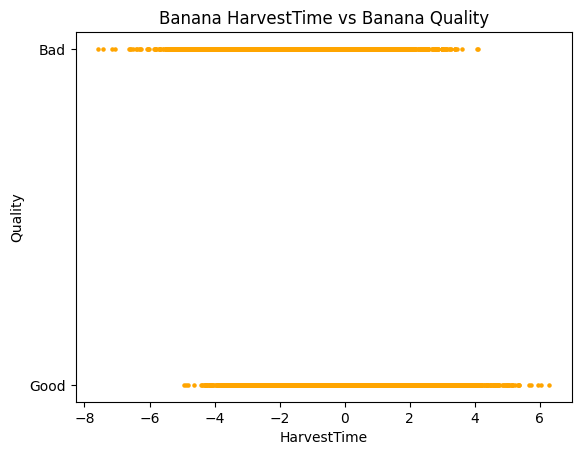

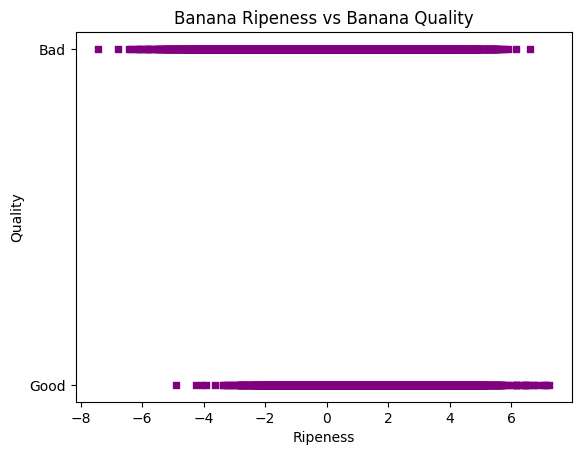

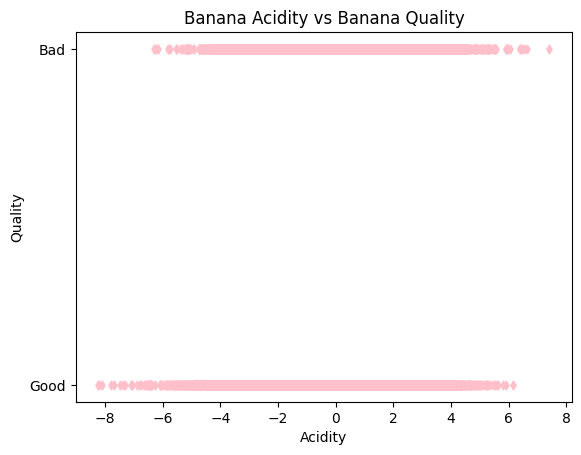

In [42]:
plt.scatter(df.Size,df.Quality,s=20,marker='o')
plt.xlabel('Size')
plt.ylabel('Quality')
plt.title('Banana Size vs Banana Quality')
plt.show()

plt.scatter(df.Weight,df.Quality,s=20,marker='*',c='green')
plt.xlabel('Weight')
plt.ylabel('Quality')
plt.title('Banana Weight vs Banana Quality')
plt.show()

plt.scatter(df.Sweetness,df.Quality,s=20,marker='x',c='red')
plt.xlabel('Sweetness')
plt.ylabel('Quality')
plt.title('Banana Sweetness vs Banana Quality')
plt.show()

plt.scatter(df.Softness,df.Quality,s=20,marker='+',c='blue')
plt.xlabel('Softness')
plt.ylabel('Quality')
plt.title('Banana Softness vs Banana Quality')
plt.show()

plt.scatter(df.HarvestTime,df.Quality,s=20,marker='.',c='orange')
plt.xlabel('HarvestTime')
plt.ylabel('Quality')
plt.title('Banana HarvestTime vs Banana Quality')
plt.show()

plt.scatter(df.Ripeness,df.Quality,s=20,marker='s',c='purple')
plt.xlabel('Ripeness')
plt.ylabel('Quality')
plt.title('Banana Ripeness vs Banana Quality')
plt.show()

plt.scatter(df.Acidity,df.Quality,s=20,marker='d',c='pink')
plt.xlabel('Acidity')
plt.ylabel('Quality')
plt.title('Banana Acidity vs Banana Quality')
plt.show()

Dividing the columns into features and target

In [43]:
# Assume the last column is the target (label) and all other columns are features
X = df.iloc[:, :-1].values  # Features (all columns except the last)
y = df.iloc[:, -1].values  # Target (last column)
print(X)
print('--------------------------')
print(y)

[[-1.9249682   0.46807805  3.0778325  ...  0.2947986   2.4355695
   0.27129033]
 [-2.4097514   0.48686993  0.34692144 ... -0.8922133   2.0675488
   0.30732512]
 [-0.3576066   1.4831762   1.5684522  ... -0.64726734  3.0906434
   1.427322  ]
 ...
 [ 1.4227225  -1.9076649  -2.532364   ... -0.5623754  -1.8347653
   0.6973611 ]
 [-2.131904   -2.7425997  -1.0080286  ... -0.80263203 -3.5802662
   0.4235689 ]
 [-2.6608794  -2.0446665   0.15902641 ... -1.5818563  -1.6058589
   1.4356443 ]]
--------------------------
['Good' 'Good' 'Good' ... 'Bad' 'Bad' 'Bad']


Converting categorical to numerical values

In [44]:
# Convert categorical target to numerical if necessary
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

y = y.reshape(y.shape[0], 1)
print(y)

[[1]
 [1]
 [1]
 ...
 [0]
 [0]
 [0]]


Normalization of data

In [45]:
# Normalize the data (only features)
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[-0.55113643  0.60972933  1.97505067 ...  0.52395094  0.78256769
   0.11449116]
 [-0.77810662  0.61905159  0.57338529 ... -0.07058475  0.60849327
   0.13020408]
 [ 0.18268513  1.11329814  1.20034726 ...  0.05210072  1.09241877
   0.61857695]
 ...
 [ 1.01621574 -0.56882668 -0.90443461 ...  0.09462033 -1.237308
   0.30027865]
 [-0.64802151 -0.98302025 -0.12205536 ... -0.0257164  -2.06293293
   0.18089199]
 [-0.895682   -0.63679029  0.47694643 ... -0.41600452 -1.12903488
   0.62220587]]


Dataset Splitting

In [46]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure y_train and y_test are floats (important for cost computation)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

Activation Functions and their Derivatives

In [47]:
def Sigmoid(z):
    return 1 / (1 + np.exp(-z))

def Sigmoid_Derivative(z):
    return Sigmoid(z) * (1 - Sigmoid(z))

def ReLU(z):
    return np.maximum(z,0)

def ReLU_Derivative(z):
    return np.where(z > 0, 1, 0)

Functions for forward propagation, backpropagation , computing cost, training the neural network and predict the output on the basis of testing dataset

In [48]:
def Forward_Propagation(X, weights, biases):
    Z1 = np.dot(X, weights['W1']) + biases['b1']
    A1 = ReLU(Z1)  # Use ReLU for hidden layer
    Z2 = np.dot(A1, weights['W2']) + biases['b2']
    A2 = Sigmoid(Z2)  # Use Sigmoid for output layer
    return A1, A2

# Cost function
def compute_cost(A2, Y):
    m = Y.shape[0] # number of rows
    cost = (-1/m) * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return np.squeeze(cost)

# Backpropagation
def Back_Propagation(X, Y, A1, A2, weights):
    m = X.shape[0] # number of rows

    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(A1.T, dZ2)
    db2 = (1/m) * np.sum(dZ2, axis=0, keepdims=True)

    dZ1 = np.dot(dZ2, weights['W2'].T) * ReLU_Derivative(A1)  # Use ReLU derivative in hidden layer
    dW1 = (1/m) * np.dot(X.T, dZ1)
    db1 = (1/m) * np.sum(dZ1, axis=0, keepdims=True)

    return dW1, db1, dW2, db2

# Initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42) # setting the starting point for pseudo random numbers
    weights = {
        'W1': np.random.randn(input_size, hidden_size) * 0.01,
        'W2': np.random.randn(hidden_size, output_size) * 0.01
    }
    biases = {
        'b1': np.zeros((1, hidden_size)),
        'b2': np.zeros((1, output_size))
    }
    return weights, biases

# Training the neural network
def Train_Network(X, Y, hidden_size, epochs, learning_rate):
    input_size = X.shape[1] # number of columns
    output_size = 1  # output contains only 1 neuron as it is a Binary classification

    weights, biases = initialize_parameters(input_size, hidden_size, output_size)
    costs = []

    for epoch in range(epochs):
        # Forward propagation
        A1, A2 = Forward_Propagation(X, weights, biases)

        # Cost computation
        cost = compute_cost(A2, Y)
        costs.append(cost)

        # Backpropagation
        dW1, db1, dW2, db2 = Back_Propagation(X, Y, A1, A2, weights)

        # Update weights and biases
        weights['W1'] -= learning_rate * dW1
        biases['b1'] -= learning_rate * db1
        weights['W2'] -= learning_rate * dW2
        biases['b2'] -= learning_rate * db2

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Cost: {cost}")

    return weights, biases, costs

# Prediction
def Predict_Output(X, weights, biases):
    _, A2 = Forward_Propagation(X, weights, biases)
    return A2 > 0.5

Epoch 0, Cost: 0.6930307077637659
Epoch 100, Cost: 0.6928646559620514
Epoch 200, Cost: 0.6926191903864194
Epoch 300, Cost: 0.6922255955585823
Epoch 400, Cost: 0.6915715435062458
Epoch 500, Cost: 0.6904743781661796
Epoch 600, Cost: 0.6886274313756109
Epoch 700, Cost: 0.6855338708857203
Epoch 800, Cost: 0.6804121332141173
Epoch 900, Cost: 0.6721039414770708
Epoch 1000, Cost: 0.6590402732943459
Epoch 1100, Cost: 0.6395000603471105
Epoch 1200, Cost: 0.6123232402048221
Epoch 1300, Cost: 0.5779221886234743
Epoch 1400, Cost: 0.5386274183073364
Epoch 1500, Cost: 0.4976721690066389
Epoch 1600, Cost: 0.4579200931986235
Epoch 1700, Cost: 0.4214771140048461
Epoch 1800, Cost: 0.38975149095084166
Epoch 1900, Cost: 0.36337195358380536
Epoch 2000, Cost: 0.3421971028992257
Epoch 2100, Cost: 0.32553997444748334
Epoch 2200, Cost: 0.31249045559614047
Epoch 2300, Cost: 0.3021692795604984
Epoch 2400, Cost: 0.2938694512354996
Epoch 2500, Cost: 0.28702307919339304
Epoch 2600, Cost: 0.28122562186743827
Epoch 2

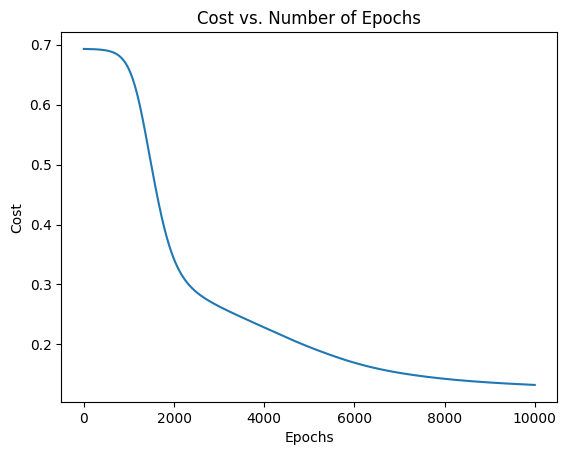

Model Accuracy: 0.96


In [49]:
# Training parameters
epochs = 10000
hidden_size = 10
learning_rate = 0.01

# Train the model
weights, biases, costs = Train_Network(X_train, y_train, hidden_size, epochs, learning_rate)

# Plot cost vs. number of epochs
plt.plot(range(epochs), costs)
plt.title('Cost vs. Number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.show()

predictions = Predict_Output(X_test, weights, biases)
predicted_classes = (predictions > 0.5).astype(int)  # Binary classification threshold
accuracy = accuracy_score(y_test, predicted_classes)
print(f"Model Accuracy: {accuracy:.2f}")